In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns


**1. Построить случайный граф размерностью не менее 500 вершин.**
 - В полном графе из 500 вершин было бы 124750 ребер. Оставим из них десятую часть.
 
**2. Визуализировать граф, используя стандартные функции библиотеки networkx.**

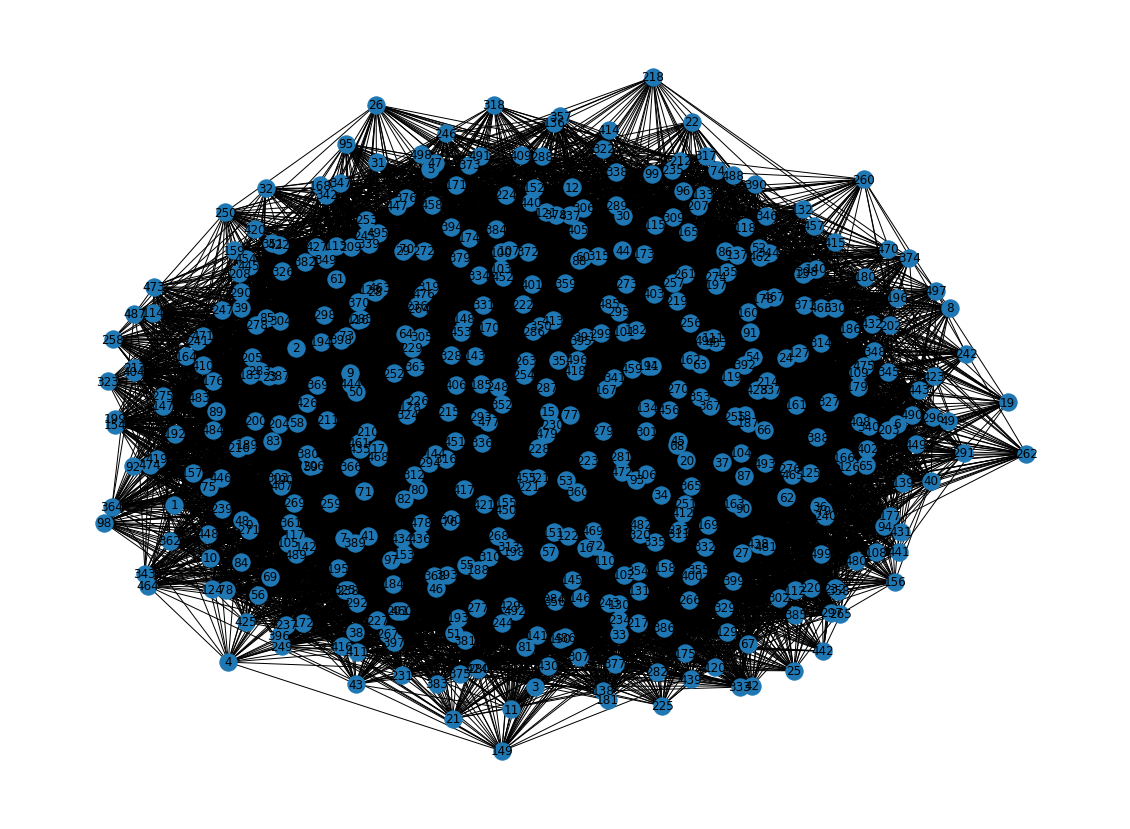

In [ ]:
size = 500  # Количество вершин в графе
G_random = nx.dense_gnm_random_graph(
    n=size,  # Количество вершин
    m=(sum(range(size))//10), # Количество ребер
    seed=74  
  )
fig, ax = plt.subplots(figsize=(20, 15))
nx.draw(G_random, with_labels=True)  # Отрисовка графа



3. Визуализировать граф из п.1 по следующему принципу: 
  - вершины с большими степенями должны находиться ближе к центру окружности.

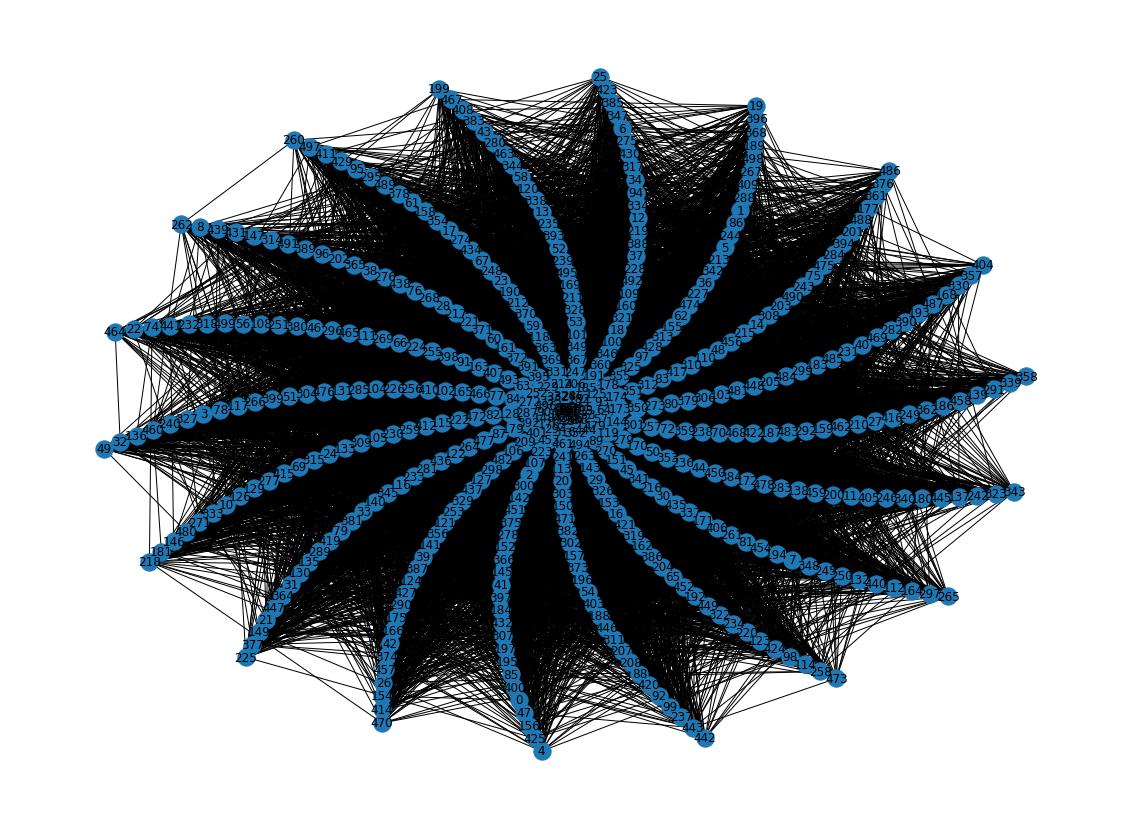

In [ ]:
def get_spiral_sorted_pos(g):
      nodes = {
        node: len(list(nx.neighbors(g, node))) for node in g.nodes()
  }
          sorted_nodes = sorted(
            list(nodes.keys()),
            key=lambda node: nodes[node],
            reverse=True
  )
              return nx.spiral_layout(sorted_nodes)  


sorted_pos = get_spiral_sorted_pos(G_random)
fig, ax = plt.subplots(figsize=(20, 15))
nx.draw(G_random, pos=sorted_pos, with_labels=True) 

**5. Построить предфрактальный граф размерностью не менее 500 вершин.**

Пошаговая визуализация добавления вершин в граф:


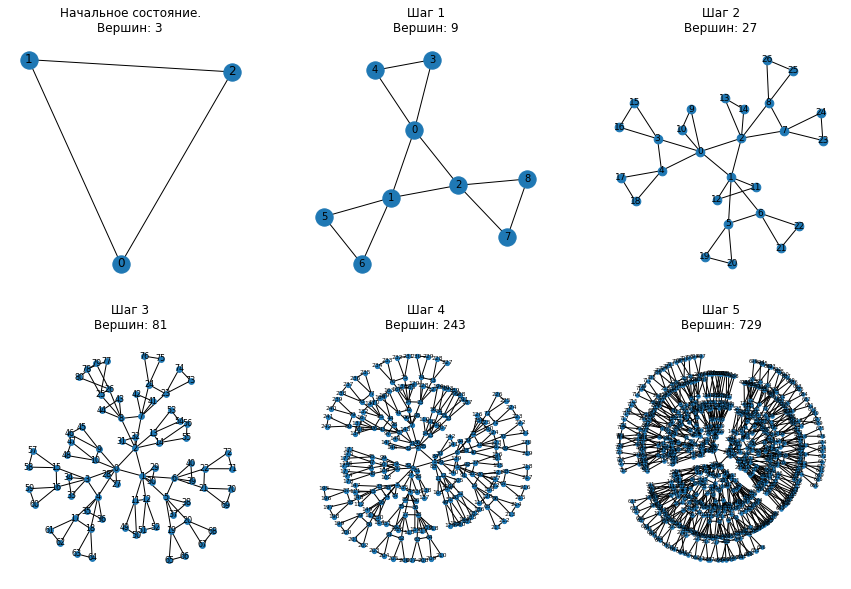

In [ ]:
f = nx.Graph([[0, 1], [1, 2], [2, 0]])
print('Пошаговая визуализация добавления вершин в граф:')

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
nx.draw(f, with_labels=True, ax=ax[0, 0])
ax[0,0].set_title(f'Начальное состояние.\nВершин: {len(f)}')

for step in range(1, 6):
      f_nodes = list(f.nodes())  
          i = iter(range(f_nodes[-1] + 1, 1000))  
              for node in f_nodes:    
   
            a, b = next(i), next(i)
            f.add_edges_from((
                (node, a),
                (node, b),
                (a, b),
              ))
          nx.draw(
              f, 
              pos=nx.kamada_kawai_layout(f), 
              with_labels=True,       
              ax=ax[step//3, step%3], 
              node_size=300//(step**2),  
              font_size=int(12-step*1.3)
            )
              ax[step//3, step%3].set_title(f'Шаг {step}\nВершин: {len(f)}')

**6. Выполнить пп.2-3 для построенного предфрактального графа**

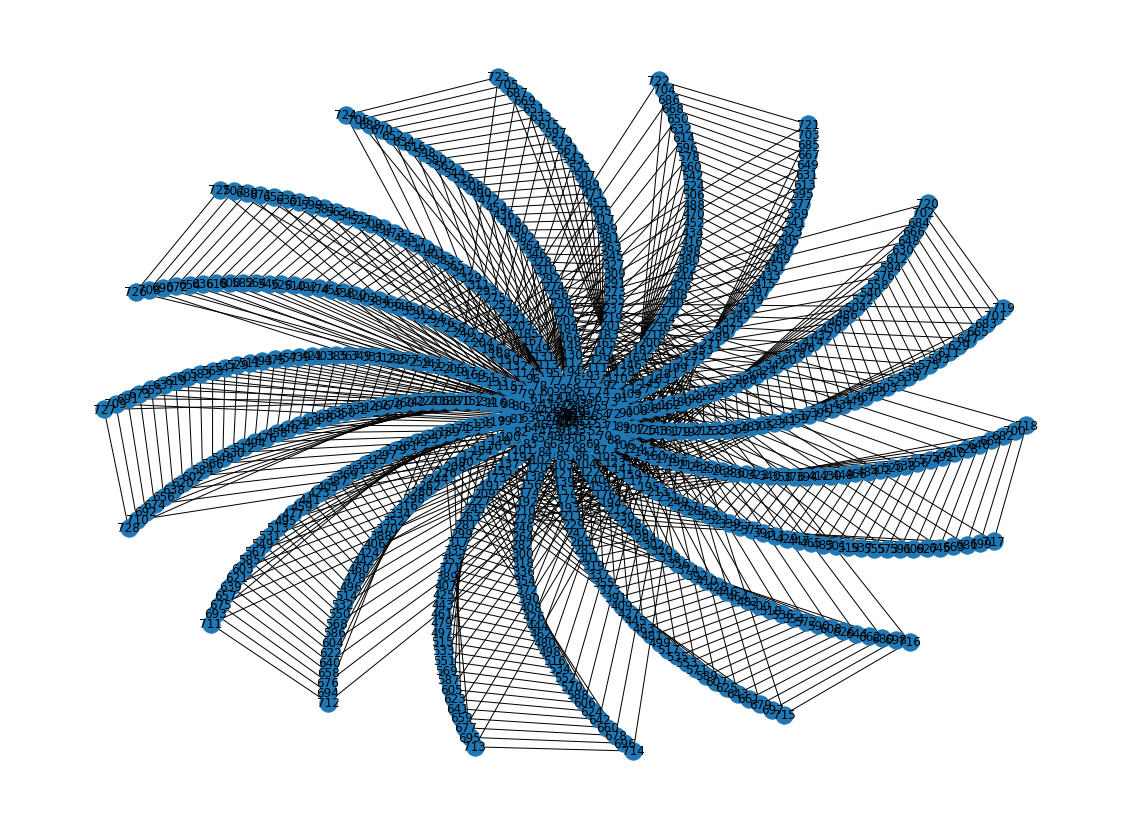

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
nx.draw(f, pos=get_spiral_sorted_pos(f), with_labels=True)   